In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#회귀분석 패키지
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [45]:
df_raw = pd.read_csv("./data/DIABETEST.csv", engine = "python")
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [46]:
df_raw.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


In [47]:
reg_model = smf.ols(formula = 'Y ~ AGE + GENDER + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG + GLUCOSE', data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.83e-62
Time:                        20:45:39   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -334.5671     67.455     -4.960      

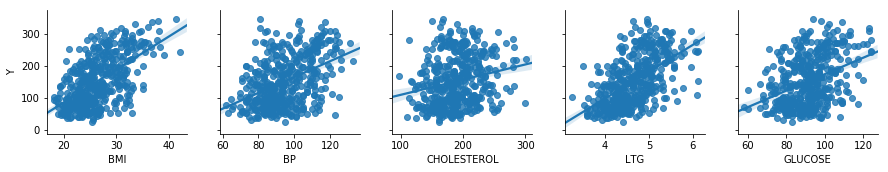

In [48]:
sns.pairplot(df_raw, y_vars='Y', x_vars=['BMI', 'BP', 'CHOLESTEROL','LTG','GLUCOSE'], kind='reg')

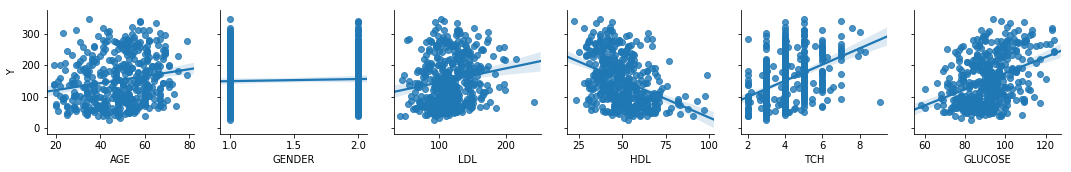

In [49]:
sns.pairplot(df_raw, y_vars='Y', x_vars=['AGE', 'GENDER', 'LDL','HDL','TCH','GLUCOSE'], kind='reg')

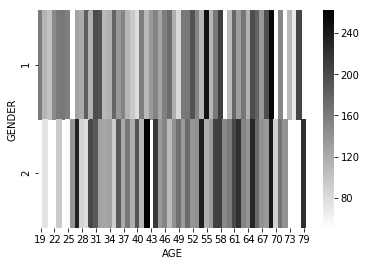

In [50]:
df_agg = df_raw.groupby(["GENDER", "AGE"], as_index = False).agg("mean")
df_pivot = df_agg.pivot("GENDER", "AGE", "Y")
sns.heatmap(df_pivot, cmap = "gray_r")

In [51]:
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [52]:
df_male = df_raw[df_raw['GENDER'] == 1]
df_male.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80
5,97,23,1,22.6,89.0,139,64.8,61.0,2.0,4.1897,68
9,310,29,1,30.0,85.0,180,93.4,43.0,4.0,5.3845,88


In [53]:
df_female = df_raw[df_raw['GENDER'] == 2]
df_female.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87
2,141,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85
6,138,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82
7,63,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92
8,110,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94


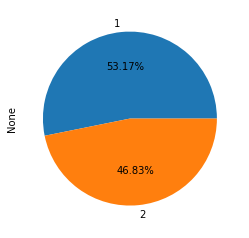

In [54]:
df_count = df_raw.groupby(["GENDER"]).size()
df_count.plot.pie(y="Y", autopct = "%.2f%%")

In [55]:
df_raw.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


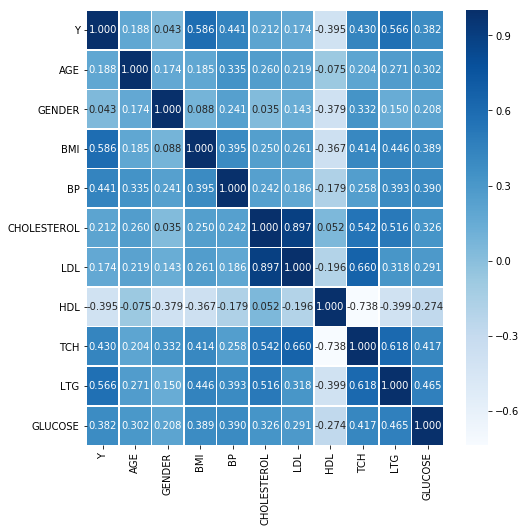

In [56]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df_raw.corr(), annot = True,
           fmt = '.3f', linewidths = .5, cmap = 'Blues')

## Male 남자

In [57]:
df_male.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.131,NaN,0.532,0.379,0.207,0.218,-0.462,0.489,0.549,0.349
AGE,0.131,1.000,NaN,0.220,0.358,0.377,0.280,0.019,0.216,0.345,0.349
GENDER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,0.532,0.220,NaN,1.000,0.349,0.249,0.294,-0.394,0.436,0.416,0.376
BP,0.379,0.358,NaN,0.349,1.000,0.274,0.182,-0.074,0.191,0.382,0.368
CHOLESTEROL,0.207,0.377,NaN,0.249,0.274,1.000,0.898,0.058,0.573,0.522,0.343
LDL,0.218,0.280,NaN,0.294,0.182,0.898,1.000,-0.194,0.680,0.333,0.316
HDL,-0.462,0.019,NaN,-0.394,-0.074,0.058,-0.194,1.000,-0.708,-0.404,-0.259
TCH,0.489,0.216,NaN,0.436,0.191,0.573,0.680,-0.708,1.000,0.648,0.442
LTG,0.549,0.345,NaN,0.416,0.382,0.522,0.333,-0.404,0.648,1.000,0.467


In [58]:
df_male_new = df_male.drop('GENDER', axis = 1)
df_male_new.head()

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
1,75,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
3,206,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80
5,97,23,22.6,89.0,139,64.8,61.0,2.0,4.1897,68
9,310,29,30.0,85.0,180,93.4,43.0,4.0,5.3845,88


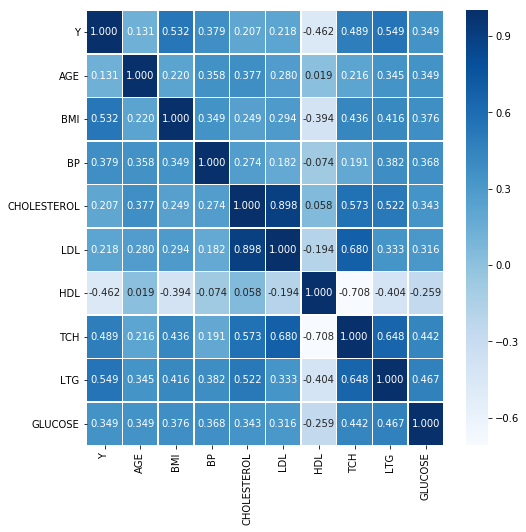

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df_male_new.corr(), annot = True,
           fmt = '.3f', linewidths = .5, cmap = 'Blues')

## Female 뇨자

In [60]:
df_female.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.243,NaN,0.652,0.528,0.215,0.121,-0.345,0.395,0.585,0.420
AGE,0.243,1.000,NaN,0.113,0.241,0.130,0.113,-0.052,0.094,0.143,0.187
GENDER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,0.652,0.113,NaN,1.000,0.439,0.249,0.206,-0.315,0.383,0.469,0.385
BP,0.528,0.241,NaN,0.439,1.000,0.206,0.130,-0.133,0.200,0.362,0.347
CHOLESTEROL,0.215,0.130,NaN,0.249,0.206,1.000,0.905,0.087,0.553,0.511,0.308
LDL,0.121,0.113,NaN,0.206,0.130,0.905,1.000,-0.110,0.632,0.273,0.220
HDL,-0.345,-0.052,NaN,-0.315,-0.133,0.087,-0.110,1.000,-0.709,-0.336,-0.156
TCH,0.395,0.094,NaN,0.383,0.200,0.553,0.632,-0.709,1.000,0.570,0.309
LTG,0.585,0.143,NaN,0.469,0.362,0.511,0.273,-0.336,0.570,1.000,0.427


In [61]:
df_female_new = df_female.drop('GENDER', axis = 1)
df_female_new.head()

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,32.1,101.0,157,93.2,38.0,4.00,4.8598,87
2,141,72,30.5,93.0,156,93.6,41.0,4.00,4.6728,85
6,138,36,22.0,90.0,160,99.6,50.0,3.00,3.9512,82
7,63,66,26.2,114.0,255,185.0,56.0,4.55,4.2485,92
8,110,60,32.1,83.0,179,119.4,42.0,4.00,4.4773,94


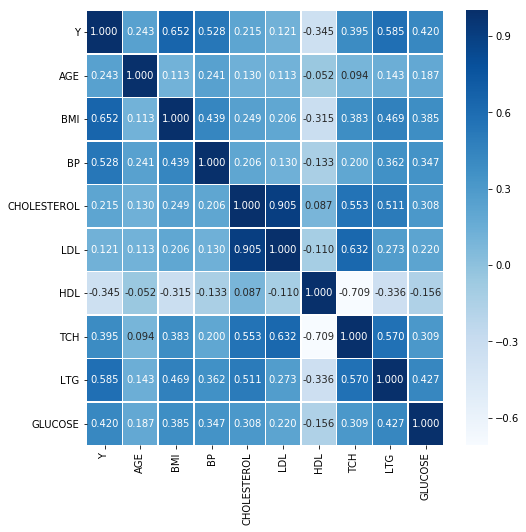

In [73]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df_female_new.corr(), annot = True,
           fmt = '.3f', linewidths = .5, cmap = 'Blues')

In [63]:
reg_model = smf.ols(formula = 'Y ~ AGE + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG + GLUCOSE', data = df_male_new)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     23.66
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.37e-28
Time:                        20:45:46   Log-Likelihood:                -1272.1
No. Observations:                 235   AIC:                             2564.
Df Residuals:                     225   BIC:                             2599.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -367.9761     94.499     -3.894      

In [64]:
reg_model = smf.ols(formula = 'Y ~ AGE + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG + GLUCOSE', data = df_female_new)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     32.88
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           8.78e-35
Time:                        20:45:46   Log-Likelihood:                -1101.3
No. Observations:                 207   AIC:                             2223.
Df Residuals:                     197   BIC:                             2256.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -466.1424     97.755     -4.768      

In [68]:
df_male_drop = df_male_new.drop('Y', axis = 1)
df_male_drop.head()

,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80
5,23,22.6,89.0,139,64.8,61.0,2.0,4.1897,68
9,29,30.0,85.0,180,93.4,43.0,4.0,5.3845,88


In [70]:
df_male_new_const = add_constant(df_male_drop)
df_male_new_const.head()

,const,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
1,1.0,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
3,1.0,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,1.0,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80
5,1.0,23,22.6,89.0,139,64.8,61.0,2.0,4.1897,68
9,1.0,29,30.0,85.0,180,93.4,43.0,4.0,5.3845,88


In [71]:
df_vif = pd.DataFrame()
df_vif['variable'] = df_male_new_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_male_new_const.values, i) for i in range(df_male_new_const.shape[1])]
df_vif.sort_values('VIF', inplace = True)
df_vif.round(3)

,variable,VIF
1,AGE,1.343
3,BP,1.401
2,BMI,1.485
9,GLUCOSE,1.518
7,TCH,8.876
8,LTG,11.264
6,HDL,15.672
5,LDL,43.710
4,CHOLESTEROL,65.651
0,const,681.608


In [76]:
reg_model = smf.ols(formula = 'AGE ~ BP + BMI + TCH + LTG + HDL', data =df_male_new_const)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    AGE   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     12.41
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           4.34e-12
Time:                        21:05:48   Log-Likelihood:                -904.68
No. Observations:                 235   AIC:                             1823.
Df Residuals:                     228   BIC:                             1848.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.5941     10.485     -3.395      0.0

In [ ]:
reg_model = smf.ols(formula = 'AGE + BP + BMI + GLUCOSE + HDL + CHOLESTEROL', data =df_male_new_const)
reg_result = reg_model.fit()
print(reg_result.summary())